In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import joblib

In [34]:
#plotting style 
sns.set(style="whitegrid")

In [35]:
np.random.seed(0) #synthetic datasedrt

In [36]:
n_samples = 30000

In [37]:
data = {
    'Age': np.random.randint(18,70,size=n_samples),
    'Weight' :np.random.randint(50,150,size=n_samples),
    'Height' :  np.random.randint(140,210,size=n_samples),
    'Training_Intensity':np.random.randint(1.0,3.0,size=n_samples),
    'Calories_Burned': np.random.uniform(1000, 4000, size=n_samples),
    'Protein': np.random.uniform(30, 150, size=n_samples),  
    'Carbohydrates': np.random.uniform(50, 300, size=n_samples),  
    'Fat': np.random.uniform(20, 100, size=n_samples),  
    'Hydration': np.random.uniform(1.0, 4.0, size=n_samples),
    'Sleep_Hours': np.random.uniform(4.0, 12.0, size=n_samples),  
    'Calories_Needed': np.random.uniform(2000, 3500, size=n_samples)  }

In [38]:
df = pd.DataFrame(data)
print("First few rows:")
print(df.head())

print("\nSummary statistics:")
print(df.describe())

print("\nData information:")
print(df.info())

First few rows:
   Age  Weight  Height  Training_Intensity  Calories_Burned     Protein  \
0   62      87     180                   2      3864.555227   42.108471   
1   65     134     199                   1      3205.378760   83.159981   
2   18     113     155                   1      1168.722897   40.480129   
3   21      56     194                   1      3844.091024  149.460977   
4   21      79     192                   1      1986.528362  111.304652   

   Carbohydrates        Fat  Hydration  Sleep_Hours  Calories_Needed  
0     266.121514  84.456052   3.071066     6.641436      2902.896193  
1     176.122054  78.676447   1.037479     7.085631      2005.560516  
2     232.090947  51.704638   3.578949     6.584213      3498.790607  
3     185.152640  96.186711   1.026218    10.397282      3273.728900  
4     228.191186  90.743604   3.230204    10.927036      2324.512985  

Summary statistics:
                Age        Weight        Height  Training_Intensity  \
count  30000.00

In [39]:
X =df[['Age', 'Weight', 'Height', 'Training_Intensity','Calories_Burned','Protein', 'Carbohydrates','Fat','Hydration','Sleep_Hours']]
y=df['Calories_Needed']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set Shape: ", X_train.shape)
print("Testing set shape: ",X_test.shape)

Training set Shape:  (24000, 10)
Testing set shape:  (6000, 10)


In [40]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test)

# Save the model and scaler
joblib.dump(model, 'calorie_prediction_model.pkl')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


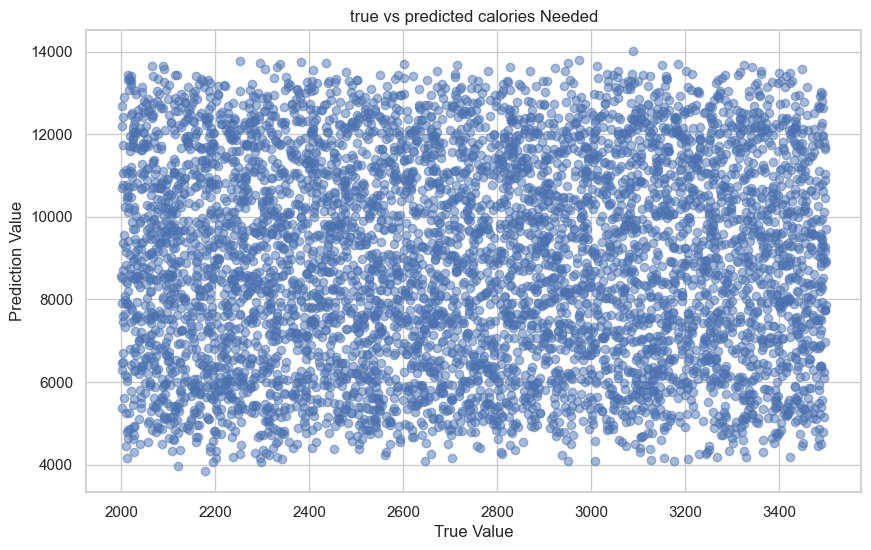

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('True Value')
plt.ylabel('Prediction Value')
plt.title('true vs predicted calories Needed')
plt.show()

In [42]:

# Function to get user input and predict calories needed
def get_user_input():
    age = int(input("Enter Age: "))
    weight = int(input("Enter Weight (kg): "))
    height = int(input("Enter Height (cm): "))
    training_intensity = float(input("Enter Training Intensity (1.0 to 3.0): "))
    calories_burned = float(input("Enter Calories Burned: "))
    protein = float(input("Enter Protein Intake (grams): "))
    carbohydrates = float(input("Enter Carbohydrates Intake (grams): "))
    fat = float(input("Enter Fat Intake (grams): "))
    hydration = float(input("Enter Hydration (liters): "))
    sleep_hours = float(input("Enter Sleep Hours: "))

    # Create a DataFrame from the user input
    user_data = pd.DataFrame({
        'Age': [age],
        'Weight': [weight],
        'Height': [height],
        'Training_Intensity': [training_intensity],
        'Calories_Burned': [calories_burned],
        'Protein': [protein],
        'Carbohydrates': [carbohydrates],
        'Fat': [fat],
        'Hydration': [hydration],
        'Sleep_Hours': [sleep_hours]
    })

    # Predict calories needed
    predicted_calories_value = loaded_model.predict(user_data)
    print(f"Predicted Calories Needed: {predicted_calories_value[0]:.2f}")

# Call the function to get user input and predict
get_user_input()


Predicted Calories Needed: 2796.30


C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
